# Data loading:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline                           
import seaborn as sns                               #importing all packages required for Exploratory Data Analysis
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float.format',lambda x:'%.5f'%x)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler            
from sklearn.feature_selection import RFE           # importing all packages required for building a logistic regression model
from sklearn.metrics import accuracy_score ,roc_curve,roc_auc_score,precision_recall_curve
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('Leads.csv')

# Data Understanding:

In [4]:
df.head()                                       # First five rows of the dataset

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00000,0,0.00000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00000,15.00000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00000,674,2.50000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00000,15.00000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00000,1532,2.00000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00000,20.00000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00000,305,1.00000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00000,17.00000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00000,1428,1.00000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00000,18.00000,No,No,Modified


In [5]:
df.columns                       # displaying the columns of dataframe

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
df.info()            # information of columns of dataframes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning:

In [7]:
df = df.replace('Select',np.nan)    # We see that 'Select' is equivalent to NaN. So we are replacing it with np.nan

In [8]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00000,0,0.00000,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.00000,15.00000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00000,674,2.50000,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.00000,15.00000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00000,1532,2.00000,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00000,20.00000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00000,305,1.00000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.00000,17.00000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00000,1428,1.00000,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.00000,18.00000,No,No,Modified


In [9]:
x = pd.DataFrame()
x['Columns'] = df.columns
x['Data_type']  = df.dtypes.values
x['Unique_count'] = df.nunique().values
x['null_value_percentage'] = df.isnull().sum().values*100/len(df)
x['null_value_percentage'] = x['null_value_percentage'].apply(lambda x: round(x,2))
x=x.sort_values(by='null_value_percentage',ascending=False)            
x                # creating a new dataframe with column names,Data type,Unique values and their percentage of null values sorted
                 # on descending order of null_value_percentage

,Columns,Data_type,Unique_count,null_value_percentage
13,How did you hear about X Education,object,9,78.46000
28,Lead Profile,object,5,74.19000
25,Lead Quality,object,5,51.59000
33,Asymmetrique Profile Score,float64,10,45.65000
32,Asymmetrique Activity Score,float64,12,45.65000
30,Asymmetrique Activity Index,object,3,45.65000
31,Asymmetrique Profile Index,object,3,45.65000
29,City,object,6,39.71000
12,Specialization,object,18,36.58000
24,Tags,object,26,36.29000


### Handling columns with only one unique value:

In [10]:
df.shape

(9240, 37)

In [11]:
col_list=x[(x['Unique_count'] == 1) & (x['null_value_percentage'] == 0)].Columns.values 
col_list
# columns which are having only one value and no null values

array(['Receive More Updates About Our Courses',
       'I agree to pay the amount through cheque',
       'Get updates on DM Content', 'Update me on Supply Chain Content',
       'Magazine'], dtype=object)

In [12]:
df.drop(col_list,axis=1,inplace=True)
# These columns will not be useful in model so we can drop them.

In [13]:
df.shape

(9240, 32)

### Handling Skewed Columns:

In [14]:
for i in df.columns[2:]:         # to find out the columns are imbalanced
    print(df[i].value_counts(normalize = True))

Landing Page Submission   0.52879
API                       0.38745
Lead Add Form             0.07771
Lead Import               0.00595
Quick Add Form            0.00011
Name: Lead Origin, dtype: float64
Google              0.31160
Direct Traffic      0.27629
Olark Chat          0.19068
Organic Search      0.12538
Reference           0.05802
Welingak Website    0.01543
Referral Sites      0.01358
Facebook            0.00598
bing                0.00065
google              0.00054
Click2call          0.00043
Social Media        0.00022
Live Chat           0.00022
Press_Release       0.00022
youtubechannel      0.00011
WeLearn             0.00011
NC_EDM              0.00011
Pay per Click Ads   0.00011
blog                0.00011
welearnblog_Home    0.00011
testone             0.00011
Name: Lead Source, dtype: float64
No    0.92056
Yes   0.07944
Name: Do Not Email, dtype: float64
No    0.99978
Yes   0.00022
Name: Do Not Call, dtype: float64
0   0.61461
1   0.38539
Name: Converted, dtype: f

In [15]:
skewed_cols = ['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']
# These are the columns which are highly imbalanced.

In [16]:
df.drop(skewed_cols,axis=1,inplace=True) # We can drop these columns from our dataframe.

In [17]:
df.shape

(9240, 22)

### Handling  null values :

#### Columns wise:

In [18]:
x[x['null_value_percentage'] > 40].Columns.values           # columns having more than 40% null values

array(['How did you hear about X Education', 'Lead Profile',
       'Lead Quality', 'Asymmetrique Profile Score',
       'Asymmetrique Activity Score', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index'], dtype=object)

In [19]:
df.drop(x[x['null_value_percentage'] > 40].Columns.values,axis=1,inplace=True)     # Droping thpse columns

In [20]:
df.shape

(9240, 15)

#### Row wise:

In [21]:
df['null_rows'] = df.isna().sum(axis = 1)         # This column shows the count of null values in each row of data.

In [22]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,null_rows
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.00000,0,0.00000,Page Visited on Website,NaN,Unemployed,Interested in other courses,NaN,No,Modified,2
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.00000,674,2.50000,Email Opened,NaN,Unemployed,Ringing,NaN,No,Email Opened,2
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.00000,1532,2.00000,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.00000,305,1.00000,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.00000,1428,1.00000,Converted to Lead,NaN,Unemployed,Will revert after reading the email,Mumbai,No,Modified,1


In [23]:
df = df[df['null_rows']<6] # Deleting the rows whose null value count is >=6.

In [24]:
df.shape

(9226, 16)

In [25]:
df.drop(['null_rows'],axis  = 1, inplace = True) # Droping the Null_rows column..

#### Imputation of remaining null values:

In [26]:
df.isnull().sum()               # We can see that there are still null values in the dataset.

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 31
Converted                                    0
TotalVisits                                123
Total Time Spent on Website                  0
Page Views Per Visit                       123
Last Activity                               93
Specialization                            3366
What is your current occupation           2689
Tags                                      3340
City                                      3655
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

#We can use mean for numerical columns and mode for categorical columns to impute the null values

In [27]:
df['Lead Source'].fillna(df['Lead Source'].mode()[0],inplace = True)
df.TotalVisits.fillna(round(df.TotalVisits.mean(),2),inplace = True)
df['Page Views Per Visit'].fillna(round(df['Page Views Per Visit'].mean(),2),inplace = True)
df['Last Activity'].fillna(df['Last Activity'].mode()[0],inplace = True)
df.Specialization.fillna(df.Specialization.mode()[0],inplace = True)
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0],inplace = True)
df.Tags.fillna(df.Tags.mode()[0],inplace = True)
df.City.fillna(df.City.mode()[0],inplace = True)

In [28]:
df.shape

(9226, 15)

In [29]:
Prospect_ID = df['Prospect ID'] # Storing the Id column for further use and dropping it in dataframe.
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [30]:
df.drop(['Last Activity'],axis=1,inplace=True)  # Dropping unneccessary columns...

In [31]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.00000,0,0.00000,Finance Management,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,0,5.00000,674,2.50000,Finance Management,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.00000,1532,2.00000,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.00000,305,1.00000,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.00000,1428,1.00000,Finance Management,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9226 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9226 non-null   object 
 1   Lead Source                             9226 non-null   object 
 2   Converted                               9226 non-null   int64  
 3   TotalVisits                             9226 non-null   float64
 4   Total Time Spent on Website             9226 non-null   int64  
 5   Page Views Per Visit                    9226 non-null   float64
 6   Specialization                          9226 non-null   object 
 7   What is your current occupation         9226 non-null   object 
 8   Tags                                    9226 non-null   object 
 9   City                                    9226 non-null   object 
 10  A free copy of Mastering The Interview  9226 non-null   obje

In [33]:
df.shape

(9226, 12)

Retained about 99.84% of data after cleaning

# Data Visualization:

In [34]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Univariate Analysis:

- Bar charts for categorical columns.
- Distribution plots for Numerical columns

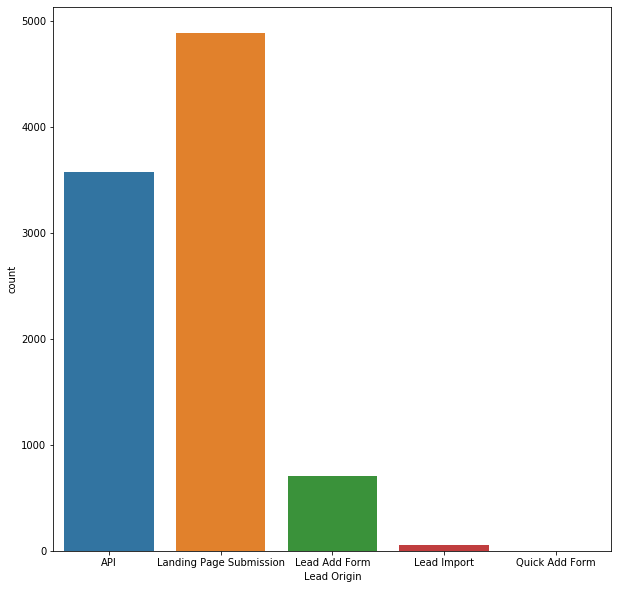

In [35]:
plt.figure(figsize=(10,10))        
sns.countplot(df['Lead Origin'])
plt.show()

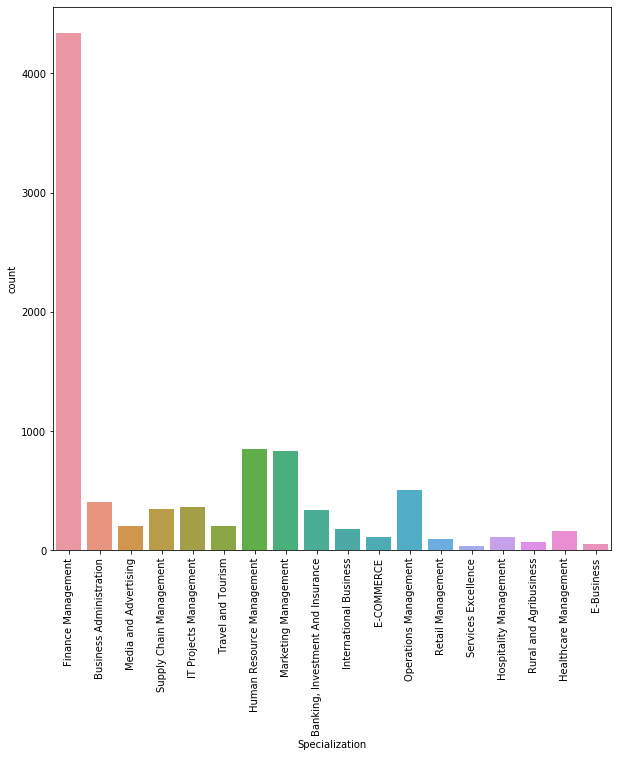

In [36]:
plt.figure(figsize=(10,10))
sns.countplot(df['Specialization'])
plt.xticks(rotation = 90)
plt.show()

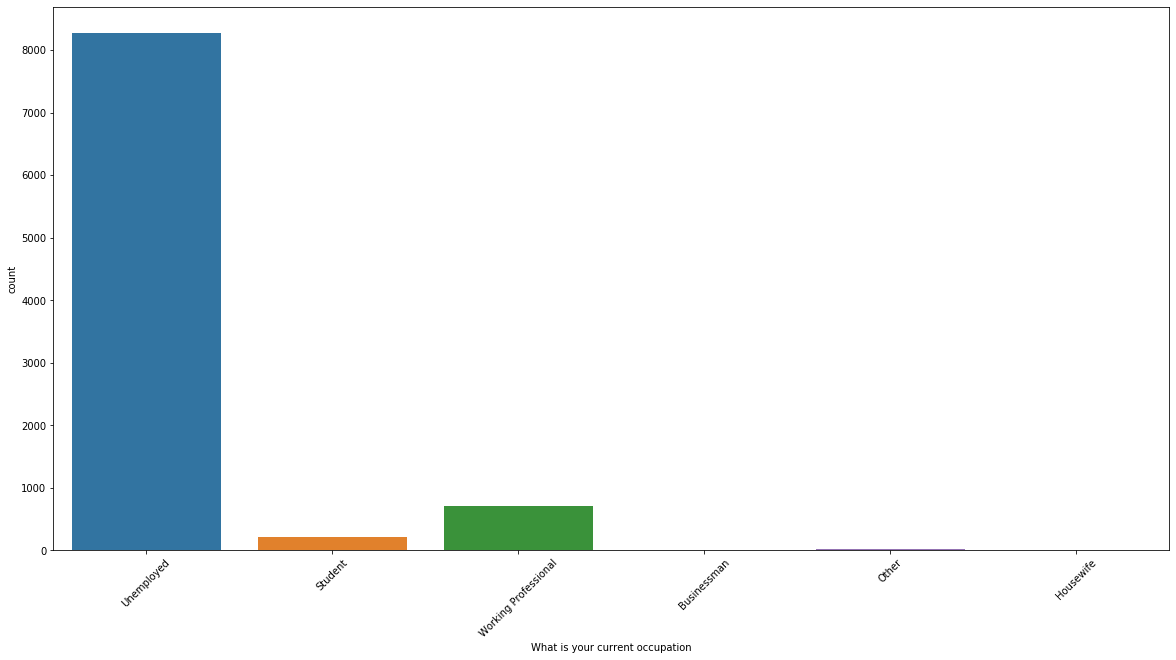

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation = 45)
plt.show()

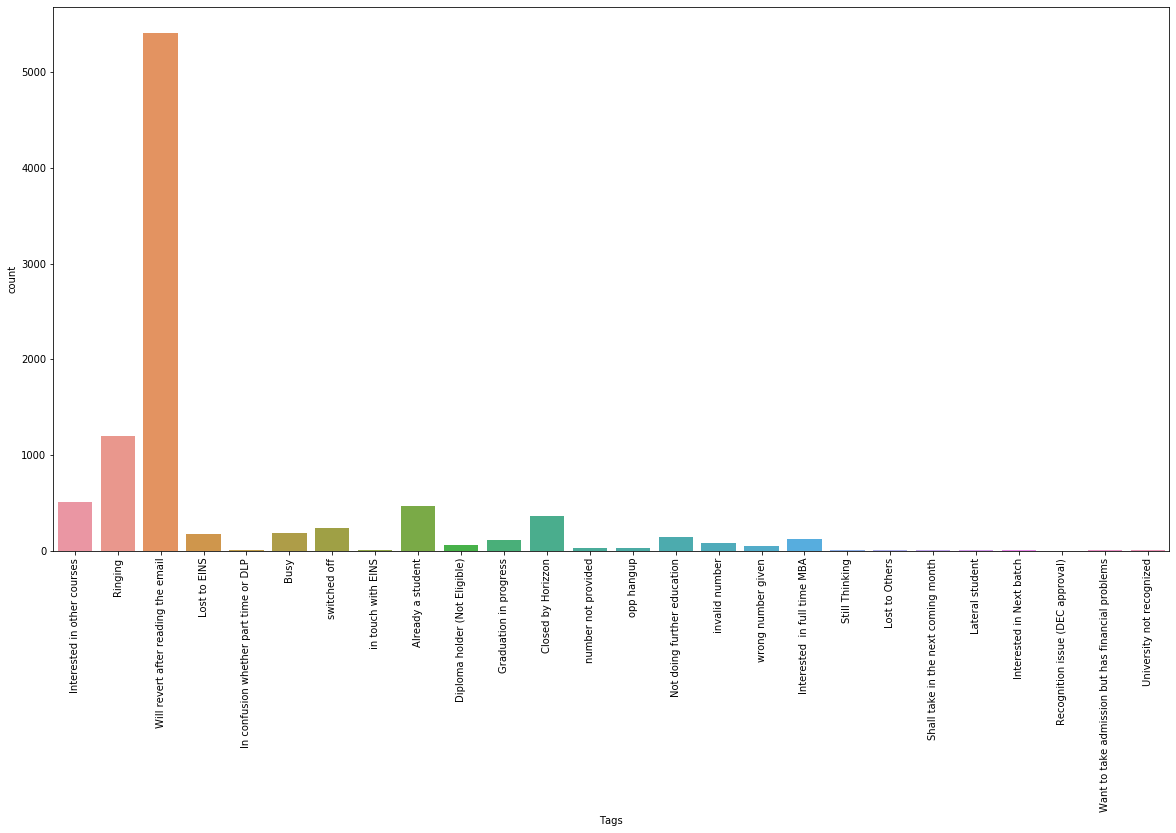

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(df['Tags'])
plt.xticks(rotation = 90)
plt.show()

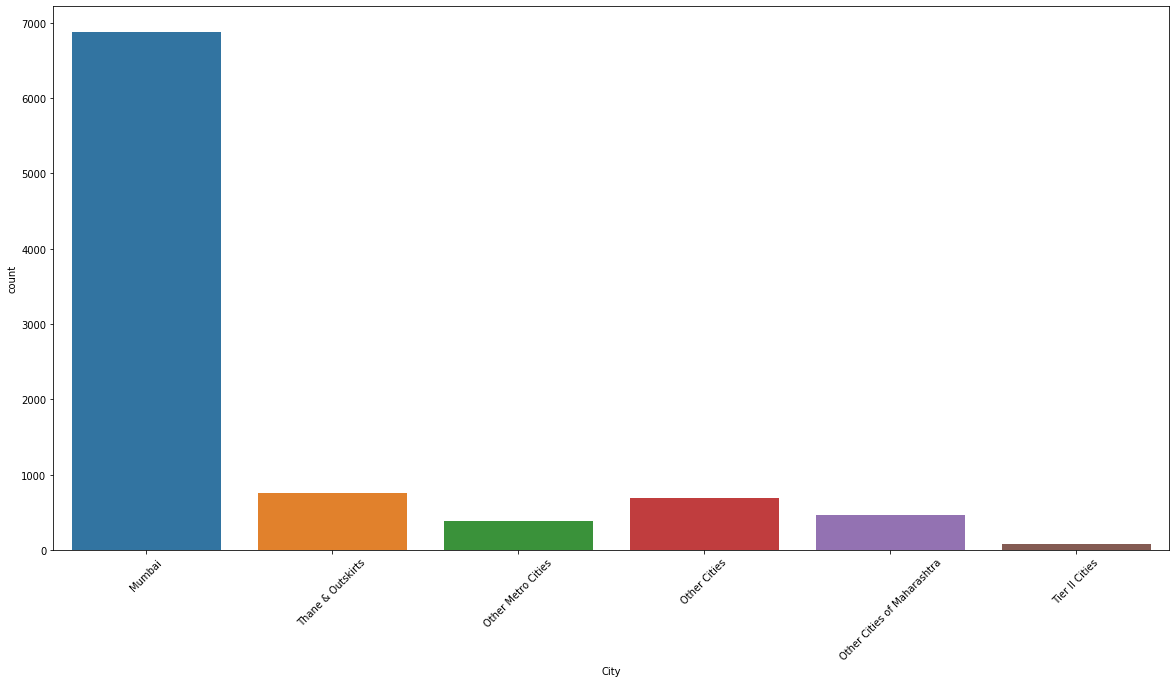

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(df['City'])
plt.xticks(rotation = 45)
plt.show()

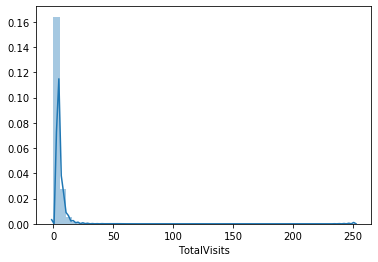

In [40]:
sns.distplot(df['TotalVisits'])

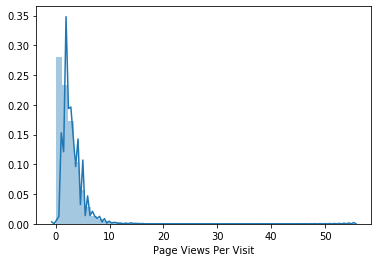

In [41]:
sns.distplot(df['Page Views Per Visit'])

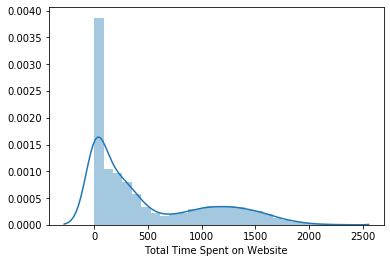

In [42]:
sns.distplot(df['Total Time Spent on Website'])

## Bivariate Analysis:

<Figure size 1584x432 with 0 Axes>

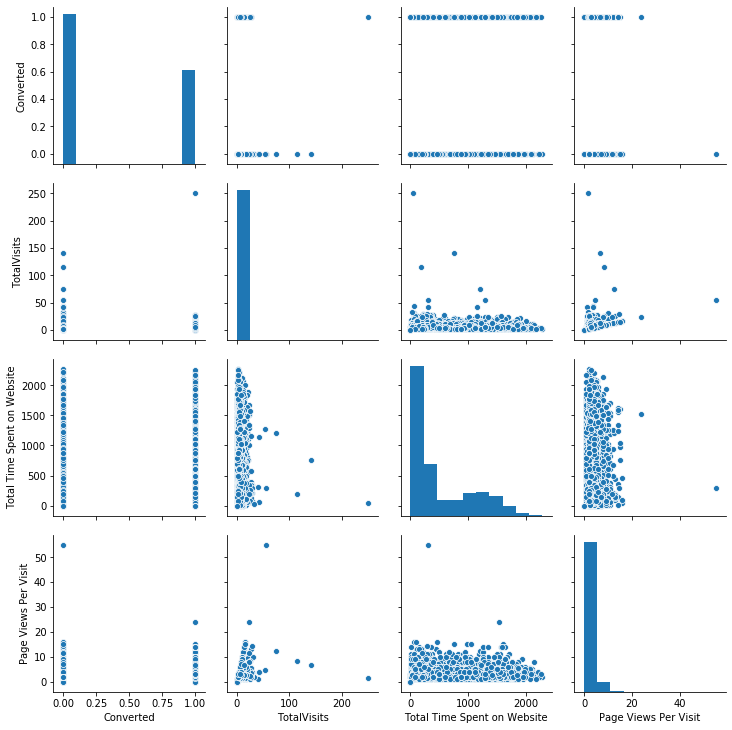

In [43]:
# we can use pair plot for this.
plt.figure(figsize=[22,6])
sns.pairplot(df)
plt.show()

#We can see that many column pairs are independent of each other i.e no observable pattern in the scatter plot.

## Outlier Analysis:

In [44]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9226.00000,9226.00000,9226.00000,9226.00000
mean,0.38500,3.44530,487.55506,2.36278
std,0.48662,4.82238,548.16164,2.14696
min,0.00000,0.00000,0.00000,0.00000
25%,0.00000,1.00000,12.00000,1.00000
50%,0.00000,3.00000,248.00000,2.00000
75%,1.00000,5.00000,936.00000,3.00000
max,1.00000,251.00000,2272.00000,55.00000


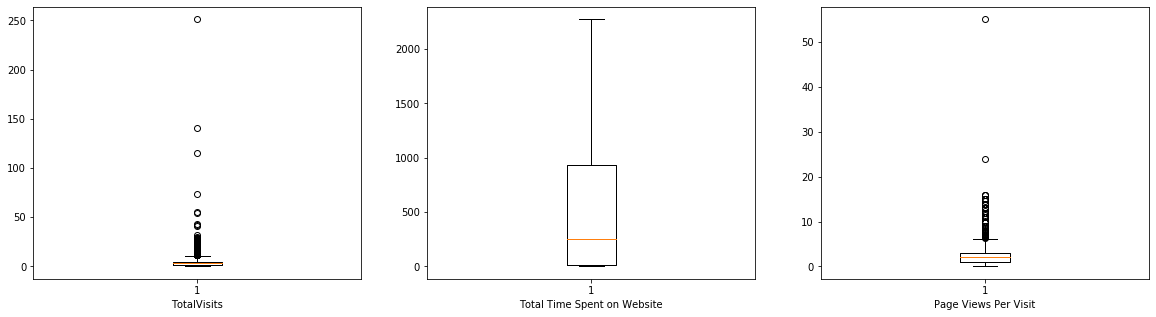

In [45]:
num_col = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
x =1           # Box plots are used in outlier analysis.
plt.figure(figsize=(20,5))
for i in num_col:
    plt.subplot(1,3,x)
    plt.xlabel(i)
    plt.boxplot(df[i])
    x +=1
plt.show()

We can see that Page views per visit and Total time spent on website does not have many outliers where as Total visits have more outliers but since none of these columns have strong relation with target variable,these outliers can be ignored.

## Corelation Analysis:

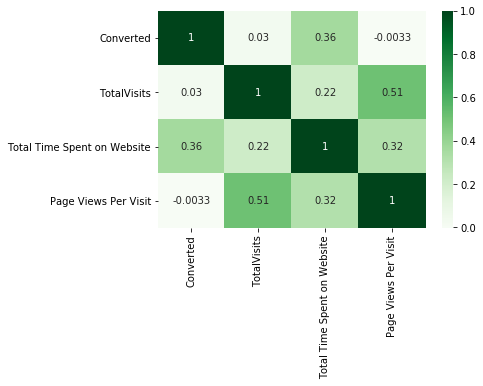

In [46]:
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

#We can see that numerical columns does not have strong correlation with target variable.

# Dummy variables:

In [47]:
cat_col = ['Lead Origin','Lead Source','Specialization','What is your current occupation','Tags','City','A free copy of Mastering The Interview','Last Notable Activity']

In [48]:
dummy_df = pd.get_dummies(df[cat_col],drop_first=True)
dummy_df.head()    # we need to convert categorical columns into numerical to include them in the model so we create dummy variables for them.

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,...,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [49]:
df.drop(cat_col,axis = 1,inplace=True)
df.head()       # Drop the original categorical columns.

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.00000,0,0.00000
1,0,5.00000,674,2.50000
2,1,2.00000,1532,2.00000
3,0,1.00000,305,1.00000
4,1,2.00000,1428,1.00000


In [50]:
df = pd.concat([df,dummy_df],axis = 1)
df.head()        # Add all the dummy variables to the dataframe.

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,...,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.00000,0,0.00000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.00000,674,2.50000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.00000,1532,2.00000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.00000,305,1.00000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.00000,1428,1.00000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Splitting Train-test data:

In [51]:
X = df.drop(['Converted'],axis=1)
y = df.Converted        

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 2)
 # Splitting data into train set and test set

# Scaling (Train set):

Scaling is important because it helps the model to converge more easily.

In [53]:
scalar = StandardScaler()
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[num_cols] = scalar.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,...,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8127,-0.80933,-0.89966,-1.10535,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8677,0.12938,1.05215,-0.17592,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5394,0.12938,-0.60162,-0.48728,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8672,-0.33997,-0.41807,-0.17592,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8447,-0.10530,-0.66886,-0.40828,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [54]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()
# We used StandardScaler to scale these numerical colums.

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6458.00000,6458.00000,6458.00000
mean,0.00000,0.00000,0.00000
std,1.00008,1.00008,1.00008
min,-0.80933,-0.89966,-1.10535
25%,-0.57465,-0.87058,-0.64063
50%,-0.10530,-0.44169,-0.17592
75%,0.36406,0.82680,0.40498
max,32.28006,3.19478,24.45407


# Model Building:

In [55]:
lm = LogisticRegression()        # creating a LogisticRegression object
lm.fit(X_train,y_train)

rfe = RFE(lm,30)                 # Selecting top 30 variables using RFE to build the model.
rfe = rfe.fit(X_train,y_train)

In [56]:
cols = X_train.columns[rfe.support_]

In [57]:
X_train_rfe = X_train[cols]

In [58]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm_1 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
lm_1.summary()                # summary of first model attempt.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1742.6
Date:                Mon, 26 Oct 2020   Deviance:                       3485.2
Time:                        19:34:59   Pearson chi2:                 1.01e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6214      0.386     -4.200      0.000      -2.378      -0.865
Total Time Spent on Website                              1.0837      0.048     22.552      0.000       0.990       1.178
Lead Origin_Landing Page Submission                     -0.7721      0.121     -6.392      0.000      -1.009      -0.535
Lead Origin_Lead Add Form                                2.8197      0.280     10.084      0.000       2.272       3.368
Lead Origin_Lead Import                                  1.0397      0.498      2.087      0.037       0.063       2.016
Lead Source_Welingak Website                             1.5352      0.784      1.958      0.050      -0.001       3.072
Specialization_Finance Management                       -0.7203      0.116     -6.207      0.000      -0.948      -0.493
What is your current occupation_Unemployed              -1.2751      0.307     -4.150      0.000      -1.877      -0.673
What is your current occupation_Working Professional     1.3314      0.394      3.376      0.001       0.559       2.104
Tags_Busy                                                2.7922      0.369      7.569      0.000       2.069       3.515
Tags_Closed by Horizzon                                  8.2695      0.783     10.565      0.000       6.735       9.804
Tags_Interested  in full time MBA                       -1.5611      1.116     -1.398      0.162      -3.749       0.627
Tags_Interested in Next batch                           25.4723   1.01e+05      0.000      1.000   -1.98e+05    1.98e+05
Tags_Interested in other courses                        -0.2008      0.473     -0.424      0.671      -1.128       0.726
Tags_Lateral student                                    29.9497   9.92e+04      0.000      1.000   -1.94e+05    1.94e+05
Tags_Lost to EINS                                        8.0138      0.669     11.973      0.000       6.702       9.326
Tags_Not doing further education                       -22.5114   1.82e+04     -0.001      0.999   -3.57e+04    3.57e+04
Tags_Ringing                                            -1.4710      0.377     -3.903      0.000      -2.210      -0.732
Tags_Will revert after reading the email                 3.2998      0.296     11.160      0.000       2.720       3.879
Tags_in touch with EINS                                  2.3262      1.091      2.133      0.033       0.188       4.464
Tags_invalid number                                    -22.5209   2.43e+04     -0.001      0.999   -4.77e+04    4.76e+04
Tags_number not provided                               -23.5310   3.61e+04     -0.001      0.999   -7.08e+04    7.08e+04
Tags_switched off                                       -2

In [59]:
y_train_pred = lm_1.predict(X_train_rfe)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()          # Fitting y_train values to the model and finding out the probability of conversion..

,Converted,Converted_Prob,CustID
0,0,0.00077,8127
1,1,0.95132,8677
2,0,0.20620,5394
3,0,0.31648,8672
4,0,0.04236,8447


In [60]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()       # our predicted values of target variable is added to the dataframe

,Converted,Converted_Prob,CustID,predicted
0,0,0.00077,8127,0
1,1,0.95132,8677,1
2,0,0.20620,5394,0
3,0,0.31648,8672,0
4,0,0.04236,8447,0


In [61]:
print(accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))      # Accuracy of the model. 

0.8973366367296377


# Feature Elimination:

- We can see some variables with high p-values (>=0.05), they need to be removed from the model.
- We also need to check for VIF values which indicates correlation between predictor variables. Variables with high VIF(>=5) are required to be removed from the model.

Order for removing variables:
- High p-value, High VIF
- High p-value, Low VIF
- High VIF, low p-value

In [62]:
lm_1.summary()   # To check for high p-values..

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1742.6
Date:                Mon, 26 Oct 2020   Deviance:                       3485.2
Time:                        19:34:59   Pearson chi2:                 1.01e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6214      0.386     -4.200      0.000      -2.378      -0.865
Total Time Spent on Website                              1.0837      0.048     22.552      0.000       0.990       1.178
Lead Origin_Landing Page Submission                     -0.7721      0.121     -6.392      0.000      -1.009      -0.535
Lead Origin_Lead Add Form                                2.8197      0.280     10.084      0.000       2.272       3.368
Lead Origin_Lead Import                                  1.0397      0.498      2.087      0.037       0.063       2.016
Lead Source_Welingak Website                             1.5352      0.784      1.958      0.050      -0.001       3.072
Specialization_Finance Management                       -0.7203      0.116     -6.207      0.000      -0.948      -0.493
What is your current occupation_Unemployed              -1.2751      0.307     -4.150      0.000      -1.877      -0.673
What is your current occupation_Working Professional     1.3314      0.394      3.376      0.001       0.559       2.104
Tags_Busy                                                2.7922      0.369      7.569      0.000       2.069       3.515
Tags_Closed by Horizzon                                  8.2695      0.783     10.565      0.000       6.735       9.804
Tags_Interested  in full time MBA                       -1.5611      1.116     -1.398      0.162      -3.749       0.627
Tags_Interested in Next batch                           25.4723   1.01e+05      0.000      1.000   -1.98e+05    1.98e+05
Tags_Interested in other courses                        -0.2008      0.473     -0.424      0.671      -1.128       0.726
Tags_Lateral student                                    29.9497   9.92e+04      0.000      1.000   -1.94e+05    1.94e+05
Tags_Lost to EINS                                        8.0138      0.669     11.973      0.000       6.702       9.326
Tags_Not doing further education                       -22.5114   1.82e+04     -0.001      0.999   -3.57e+04    3.57e+04
Tags_Ringing                                            -1.4710      0.377     -3.903      0.000      -2.210      -0.732
Tags_Will revert after reading the email                 3.2998      0.296     11.160      0.000       2.720       3.879
Tags_in touch with EINS                                  2.3262      1.091      2.133      0.033       0.188       4.464
Tags_invalid number                                    -22.5209   2.43e+04     -0.001      0.999   -4.77e+04    4.76e+04
Tags_number not provided                               -23.5310   3.61e+04     -0.001      0.999   -7.08e+04    7.08e+04
Tags_switched off                                       -2

 Variance Inflation Factor:

In [63]:
# It indicates the correlation between predictor variables.
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,15.97000
17,Tags_Will revert after reading the email,8.79000
1,Lead Origin_Landing Page Submission,3.59000
5,Specialization_Finance Management,2.96000
16,Tags_Ringing,2.83000
7,What is your current occupation_Working Profes...,2.36000
25,Last Notable Activity_Modified,2.17000
28,Last Notable Activity_SMS Sent,1.83000
12,Tags_Interested in other courses,1.73000
2,Lead Origin_Lead Add Form,1.72000


In [64]:
cols = cols.drop('Tags_Interested in Next batch',1)   # column with high p-value(1.000)

In [65]:
X_train_rfe = sm.add_constant(X_train[cols])
lm_2 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1745.0
Date:                Mon, 26 Oct 2020   Deviance:                       3489.9
Time:                        19:35:00   Pearson chi2:                 1.02e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5283      0.374     -4.086      0.000      -2.261      -0.795
Total Time Spent on Website                              1.0866      0.048     22.640      0.000       0.993       1.181
Lead Origin_Landing Page Submission                     -0.7787      0.121     -6.446      0.000      -1.015      -0.542
Lead Origin_Lead Add Form                                2.8334      0.279     10.165      0.000       2.287       3.380
Lead Origin_Lead Import                                  1.0393      0.498      2.086      0.037       0.063       2.016
Lead Source_Welingak Website                             1.5211      0.784      1.941      0.052      -0.015       3.057
Specialization_Finance Management                       -0.7190      0.116     -6.196      0.000      -0.946      -0.492
What is your current occupation_Unemployed              -1.2437      0.304     -4.092      0.000      -1.839      -0.648
What is your current occupation_Working Professional     1.3603      0.391      3.475      0.001       0.593       2.128
Tags_Busy                                                2.6639      0.353      7.541      0.000       1.972       3.356
Tags_Closed by Horizzon                                  8.1483      0.776     10.505      0.000       6.628       9.669
Tags_Interested  in full time MBA                       -1.6802      1.111     -1.512      0.131      -3.859       0.498
Tags_Interested in other courses                        -0.3271      0.461     -0.709      0.478      -1.231       0.577
Tags_Lateral student                                    29.8229   9.91e+04      0.000      1.000   -1.94e+05    1.94e+05
Tags_Lost to EINS                                        7.8930      0.661     11.939      0.000       6.597       9.189
Tags_Not doing further education                       -22.6398   1.82e+04     -0.001      0.999   -3.57e+04    3.57e+04
Tags_Ringing                                            -1.6092      0.361     -4.464      0.000      -2.316      -0.903
Tags_Will revert after reading the email                 3.1750      0.276     11.499      0.000       2.634       3.716
Tags_in touch with EINS                                  2.2030      1.087      2.026      0.043       0.072       4.334
Tags_invalid number                                    -22.6533   2.43e+04     -0.001      0.999   -4.76e+04    4.76e+04
Tags_number not provided                               -23.6686   3.61e+04     -0.001      0.999   -7.07e+04    7.07e+04
Tags_switched off                                       -2.2275      0.778     -2.862      0.004      -3.753      -0.702
Tags_wrong number given                                -23

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,15.87000
16,Tags_Will revert after reading the email,8.71000
1,Lead Origin_Landing Page Submission,3.59000
5,Specialization_Finance Management,2.96000
15,Tags_Ringing,2.81000
7,What is your current occupation_Working Profes...,2.36000
24,Last Notable Activity_Modified,2.17000
27,Last Notable Activity_SMS Sent,1.83000
2,Lead Origin_Lead Add Form,1.72000
11,Tags_Interested in other courses,1.72000


In [67]:
cols = cols.drop('Tags_Lateral student',1)

Repeat this steps till all the variables have p-values and VIF values under the limit.

In [68]:
X_train_rfe = sm.add_constant(X_train[cols])
lm_3 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1755.1
Date:                Mon, 26 Oct 2020   Deviance:                       3510.2
Time:                        19:35:01   Pearson chi2:                 1.03e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4157      0.363     -3.900      0.000      -2.127      -0.704
Total Time Spent on Website                              1.0829      0.048     22.652      0.000       0.989       1.177
Lead Origin_Landing Page Submission                     -0.7809      0.120     -6.482      0.000      -1.017      -0.545
Lead Origin_Lead Add Form                                2.8451      0.277     10.266      0.000       2.302       3.388
Lead Origin_Lead Import                                  1.0305      0.498      2.071      0.038       0.055       2.006
Lead Source_Welingak Website                             1.4993      0.783      1.915      0.056      -0.035       3.034
Specialization_Finance Management                       -0.7110      0.116     -6.144      0.000      -0.938      -0.484
What is your current occupation_Unemployed              -1.1976      0.299     -4.001      0.000      -1.784      -0.611
What is your current occupation_Working Professional     1.3984      0.387      3.612      0.000       0.640       2.157
Tags_Busy                                                2.5019      0.341      7.329      0.000       1.833       3.171
Tags_Closed by Horizzon                                  7.9745      0.770     10.356      0.000       6.465       9.484
Tags_Interested  in full time MBA                       -1.8291      1.106     -1.653      0.098      -3.998       0.339
Tags_Interested in other courses                        -0.4910      0.452     -1.086      0.278      -1.377       0.395
Tags_Lost to EINS                                        7.7179      0.654     11.793      0.000       6.435       9.001
Tags_Not doing further education                       -22.8050   1.82e+04     -0.001      0.999   -3.58e+04    3.57e+04
Tags_Ringing                                            -1.7703      0.349     -5.075      0.000      -2.454      -1.087
Tags_Will revert after reading the email                 3.0091      0.261     11.537      0.000       2.498       3.520
Tags_in touch with EINS                                  2.0396      1.083      1.883      0.060      -0.083       4.162
Tags_invalid number                                    -22.8128   2.43e+04     -0.001      0.999   -4.76e+04    4.76e+04
Tags_number not provided                               -23.8243   3.61e+04     -0.001      0.999   -7.08e+04    7.07e+04
Tags_switched off                                       -2.3867      0.773     -3.088      0.002      -3.902      -0.872
Tags_wrong number given                                -23.2573   3.28e+04     -0.001      0.999   -6.43e+04    6.43e+04
Last Notable Activity_Email Bounced                     -1

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,15.82000
15,Tags_Will revert after reading the email,8.66000
1,Lead Origin_Landing Page Submission,3.59000
5,Specialization_Finance Management,2.96000
14,Tags_Ringing,2.80000
7,What is your current occupation_Working Profes...,2.35000
23,Last Notable Activity_Modified,2.17000
26,Last Notable Activity_SMS Sent,1.83000
2,Lead Origin_Lead Add Form,1.72000
11,Tags_Interested in other courses,1.72000


In [70]:
cols = cols.drop('Tags_Not doing further education',1)

In [71]:
X_train_rfe = sm.add_constant(X_train[cols])
lm_4 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1759.1
Date:                Mon, 26 Oct 2020   Deviance:                       3518.2
Time:                        19:35:02   Pearson chi2:                 1.04e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5695      0.365     -4.294      0.000      -2.286      -0.853
Total Time Spent on Website                              1.0831      0.048     22.655      0.000       0.989       1.177
Lead Origin_Landing Page Submission                     -0.7811      0.120     -6.487      0.000      -1.017      -0.545
Lead Origin_Lead Add Form                                2.7955      0.273     10.222      0.000       2.260       3.332
Lead Origin_Lead Import                                  1.0304      0.498      2.071      0.038       0.055       2.006
Lead Source_Welingak Website                             1.5463      0.782      1.978      0.048       0.014       3.079
Specialization_Finance Management                       -0.7083      0.116     -6.127      0.000      -0.935      -0.482
What is your current occupation_Unemployed              -1.2239      0.300     -4.073      0.000      -1.813      -0.635
What is your current occupation_Working Professional     1.3285      0.386      3.441      0.001       0.572       2.085
Tags_Busy                                                2.6815      0.340      7.876      0.000       2.014       3.349
Tags_Closed by Horizzon                                  8.1591      0.769     10.604      0.000       6.651       9.667
Tags_Interested  in full time MBA                       -1.6417      1.106     -1.484      0.138      -3.810       0.527
Tags_Interested in other courses                        -0.2959      0.450     -0.657      0.511      -1.178       0.586
Tags_Lost to EINS                                        7.8989      0.654     12.080      0.000       6.617       9.180
Tags_Ringing                                            -1.5875      0.348     -4.566      0.000      -2.269      -0.906
Tags_Will revert after reading the email                 3.1903      0.260     12.283      0.000       2.681       3.699
Tags_in touch with EINS                                  2.2194      1.083      2.049      0.040       0.096       4.343
Tags_invalid number                                    -22.6346   2.43e+04     -0.001      0.999   -4.76e+04    4.76e+04
Tags_number not provided                               -23.6462   3.61e+04     -0.001      0.999   -7.07e+04    7.07e+04
Tags_switched off                                       -2.2100      0.773     -2.861      0.004      -3.724      -0.696
Tags_wrong number given                                -23.0797   3.28e+04     -0.001      0.999   -6.43e+04    6.43e+04
Last Notable Activity_Email Bounced                     -1.3677      0.701     -1.952      0.051      -2.741       0.006
Last Notable Activity_Had a Phone Conversation           3

In [72]:
cols = cols.drop('Tags_invalid number',1)

In [73]:
X_train_rfe = sm.add_constant(X_train[cols])
lm_5 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
lm_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1762.4
Date:                Mon, 26 Oct 2020   Deviance:                       3524.8
Time:                        19:35:02   Pearson chi2:                 1.05e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7021      0.370     -4.599      0.000      -2.428      -0.977
Total Time Spent on Website                              1.0869      0.048     22.729      0.000       0.993       1.181
Lead Origin_Landing Page Submission                     -0.7862      0.121     -6.524      0.000      -1.022      -0.550
Lead Origin_Lead Add Form                                2.8059      0.274     10.240      0.000       2.269       3.343
Lead Origin_Lead Import                                  1.0269      0.498      2.063      0.039       0.051       2.002
Lead Source_Welingak Website                             1.5348      0.782      1.963      0.050       0.002       3.067
Specialization_Finance Management                       -0.7039      0.116     -6.085      0.000      -0.931      -0.477
What is your current occupation_Unemployed              -1.2743      0.304     -4.191      0.000      -1.870      -0.678
What is your current occupation_Working Professional     1.2878      0.390      3.306      0.001       0.524       2.051
Tags_Busy                                                2.8748      0.336      8.555      0.000       2.216       3.533
Tags_Closed by Horizzon                                  8.3446      0.768     10.863      0.000       6.839       9.850
Tags_Interested  in full time MBA                       -1.4782      1.109     -1.334      0.182      -3.651       0.694
Tags_Interested in other courses                        -0.1166      0.448     -0.260      0.795      -0.996       0.762
Tags_Lost to EINS                                        8.0843      0.652     12.390      0.000       6.805       9.363
Tags_Ringing                                            -1.3904      0.342     -4.060      0.000      -2.062      -0.719
Tags_Will revert after reading the email                 3.3763      0.256     13.211      0.000       2.875       3.877
Tags_in touch with EINS                                  2.4058      1.082      2.223      0.026       0.285       4.527
Tags_number not provided                               -22.4469   2.19e+04     -0.001      0.999   -4.29e+04    4.29e+04
Tags_switched off                                       -2.0115      0.770     -2.612      0.009      -3.521      -0.502
Tags_wrong number given                                -21.8804   1.99e+04     -0.001      0.999    -3.9e+04     3.9e+04
Last Notable Activity_Email Bounced                     -1.3741      0.701     -1.961      0.050      -2.747      -0.001
Last Notable Activity_Had a Phone Conversation           3.5291      1.374      2.568      0.010       0.836       6.222
Last Notable Activity_Modified                          -1

In [74]:
cols = cols.drop('Tags_number not provided',1)

In [75]:
X_train_rfe = sm.add_constant(X_train[cols])
lm_6 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
lm_6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1765.2
Date:                Mon, 26 Oct 2020   Deviance:                       3530.5
Time:                        19:35:03   Pearson chi2:                 1.06e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8008      0.374     -4.810      0.000      -2.535      -1.067
Total Time Spent on Website                              1.0849      0.048     22.713      0.000       0.991       1.179
Lead Origin_Landing Page Submission                     -0.7858      0.120     -6.528      0.000      -1.022      -0.550
Lead Origin_Lead Add Form                                2.8113      0.274     10.248      0.000       2.274       3.349
Lead Origin_Lead Import                                  1.0163      0.496      2.050      0.040       0.045       1.988
Lead Source_Welingak Website                             1.5256      0.782      1.951      0.051      -0.007       3.058
Specialization_Finance Management                       -0.6994      0.116     -6.052      0.000      -0.926      -0.473
What is your current occupation_Unemployed              -1.3083      0.307     -4.266      0.000      -1.909      -0.707
What is your current occupation_Working Professional     1.2592      0.392      3.213      0.001       0.491       2.027
Tags_Busy                                                3.0143      0.335      8.985      0.000       2.357       3.672
Tags_Closed by Horizzon                                  8.4748      0.769     11.028      0.000       6.969       9.981
Tags_Interested  in full time MBA                       -1.3545      1.110     -1.220      0.222      -3.530       0.821
Tags_Interested in other courses                         0.0155      0.449      0.035      0.972      -0.864       0.895
Tags_Lost to EINS                                        8.2143      0.653     12.582      0.000       6.935       9.494
Tags_Ringing                                            -1.2450      0.341     -3.649      0.000      -1.914      -0.576
Tags_Will revert after reading the email                 3.5092      0.256     13.704      0.000       3.007       4.011
Tags_in touch with EINS                                  2.5385      1.081      2.348      0.019       0.419       4.658
Tags_switched off                                       -1.8658      0.770     -2.425      0.015      -3.374      -0.358
Tags_wrong number given                                -20.7351   1.21e+04     -0.002      0.999   -2.37e+04    2.37e+04
Last Notable Activity_Email Bounced                     -1.3748      0.701     -1.962      0.050      -2.748      -0.001
Last Notable Activity_Had a Phone Conversation           3.5834      1.401      2.557      0.011       0.837       6.330
Last Notable Activity_Modified                          -1.0900      0.103    -10.612      0.000      -1.291      -0.889
Last Notable Activity_Olark Chat Conversation           -1

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,13.71000
14,Tags_Will revert after reading the email,6.75000
1,Lead Origin_Landing Page Submission,3.55000
5,Specialization_Finance Management,2.95000
13,Tags_Ringing,2.34000
7,What is your current occupation_Working Profes...,2.19000
20,Last Notable Activity_Modified,2.16000
23,Last Notable Activity_SMS Sent,1.82000
2,Lead Origin_Lead Add Form,1.71000
9,Tags_Closed by Horizzon,1.55000


In [77]:
cols = cols.drop('Tags_wrong number given',1)

In [78]:
X_train_rfe = sm.add_constant(X_train[cols])
lm_7 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
lm_7.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1767.4
Date:                Mon, 26 Oct 2020   Deviance:                       3534.8
Time:                        19:35:03   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8891      0.378     -5.003      0.000      -2.629      -1.149
Total Time Spent on Website                              1.0856      0.048     22.731      0.000       0.992       1.179
Lead Origin_Landing Page Submission                     -0.7879      0.120     -6.544      0.000      -1.024      -0.552
Lead Origin_Lead Add Form                                2.8177      0.275     10.257      0.000       2.279       3.356
Lead Origin_Lead Import                                  1.0154      0.496      2.047      0.041       0.043       1.987
Lead Source_Welingak Website                             1.5184      0.782      1.941      0.052      -0.015       3.051
Specialization_Finance Management                       -0.6983      0.116     -6.041      0.000      -0.925      -0.472
What is your current occupation_Unemployed              -1.3377      0.309     -4.328      0.000      -1.943      -0.732
What is your current occupation_Working Professional     1.2346      0.394      3.133      0.002       0.462       2.007
Tags_Busy                                                3.1379      0.333      9.420      0.000       2.485       3.791
Tags_Closed by Horizzon                                  8.5931      0.768     11.190      0.000       7.088      10.098
Tags_Interested  in full time MBA                       -1.2470      1.111     -1.122      0.262      -3.425       0.931
Tags_Interested in other courses                         0.1321      0.448      0.295      0.768      -0.745       1.010
Tags_Lost to EINS                                        8.3330      0.652     12.776      0.000       7.055       9.611
Tags_Ringing                                            -1.1182      0.338     -3.307      0.001      -1.781      -0.455
Tags_Will revert after reading the email                 3.6289      0.254     14.291      0.000       3.131       4.127
Tags_in touch with EINS                                  2.6579      1.080      2.460      0.014       0.540       4.775
Tags_switched off                                       -1.7384      0.768     -2.263      0.024      -3.244      -0.233
Last Notable Activity_Email Bounced                     -1.3737      0.701     -1.959      0.050      -2.748       0.001
Last Notable Activity_Had a Phone Conversation           3.6344      1.427      2.547      0.011       0.837       6.432
Last Notable Activity_Modified                          -1.0907      0.103    -10.612      0.000      -1.292      -0.889
Last Notable Activity_Olark Chat Conversation           -1.6322      0.382     -4.278      0.000      -2.380      -0.884
Last Notable Activity_Page Visited on Website           -0

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,13.44000
14,Tags_Will revert after reading the email,6.51000
1,Lead Origin_Landing Page Submission,3.55000
5,Specialization_Finance Management,2.95000
13,Tags_Ringing,2.28000
7,What is your current occupation_Working Profes...,2.17000
19,Last Notable Activity_Modified,2.16000
22,Last Notable Activity_SMS Sent,1.81000
2,Lead Origin_Lead Add Form,1.71000
9,Tags_Closed by Horizzon,1.54000


In [80]:
cols = cols.drop('Tags_Interested in other courses',1)

In [81]:
X_train_rfe = sm.add_constant(X_train[cols])
lm_8 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1767.4
Date:                Mon, 26 Oct 2020   Deviance:                       3534.9
Time:                        19:35:04   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8560      0.358     -5.178      0.000      -2.558      -1.154
Total Time Spent on Website                              1.0859      0.048     22.743      0.000       0.992       1.179
Lead Origin_Landing Page Submission                     -0.7900      0.120     -6.571      0.000      -1.026      -0.554
Lead Origin_Lead Add Form                                2.8189      0.275     10.255      0.000       2.280       3.358
Lead Origin_Lead Import                                  1.0139      0.496      2.044      0.041       0.042       1.986
Lead Source_Welingak Website                             1.5166      0.782      1.939      0.052      -0.016       3.049
Specialization_Finance Management                       -0.6991      0.116     -6.048      0.000      -0.926      -0.473
What is your current occupation_Unemployed              -1.3308      0.307     -4.330      0.000      -1.933      -0.728
What is your current occupation_Working Professional     1.2500      0.391      3.201      0.001       0.485       2.015
Tags_Busy                                                3.0998      0.305     10.155      0.000       2.502       3.698
Tags_Closed by Horizzon                                  8.5536      0.755     11.323      0.000       7.073      10.034
Tags_Interested  in full time MBA                       -1.2862      1.102     -1.167      0.243      -3.447       0.874
Tags_Lost to EINS                                        8.2936      0.638     13.008      0.000       7.044       9.543
Tags_Ringing                                            -1.1562      0.311     -3.719      0.000      -1.766      -0.547
Tags_Will revert after reading the email                 3.5899      0.214     16.741      0.000       3.170       4.010
Tags_in touch with EINS                                  2.6187      1.072      2.443      0.015       0.518       4.719
Tags_switched off                                       -1.7758      0.757     -2.346      0.019      -3.259      -0.292
Last Notable Activity_Email Bounced                     -1.3723      0.701     -1.956      0.050      -2.747       0.003
Last Notable Activity_Had a Phone Conversation           3.6188      1.418      2.553      0.011       0.840       6.397
Last Notable Activity_Modified                          -1.0893      0.103    -10.609      0.000      -1.290      -0.888
Last Notable Activity_Olark Chat Conversation           -1.6320      0.382     -4.276      0.000      -2.380      -0.884
Last Notable Activity_Page Visited on Website           -0.6800      0.244     -2.791      0.005      -1.157      -0.203
Last Notable Activity_SMS Sent                           2

In [82]:
cols = cols.drop('Tags_Interested  in full time MBA',1)

In [83]:
X_train_rfe = sm.add_constant(X_train[cols])
lm_9 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
lm_9.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1768.4
Date:                Mon, 26 Oct 2020   Deviance:                       3536.7
Time:                        19:35:04   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9466      0.354     -5.499      0.000      -2.640      -1.253
Total Time Spent on Website                              1.0838      0.048     22.725      0.000       0.990       1.177
Lead Origin_Landing Page Submission                     -0.7822      0.120     -6.524      0.000      -1.017      -0.547
Lead Origin_Lead Add Form                                2.8106      0.274     10.276      0.000       2.275       3.347
Lead Origin_Lead Import                                  1.0156      0.496      2.048      0.041       0.044       1.987
Lead Source_Welingak Website                             1.5239      0.782      1.950      0.051      -0.008       3.056
Specialization_Finance Management                       -0.6923      0.115     -6.000      0.000      -0.918      -0.466
What is your current occupation_Unemployed              -1.3123      0.307     -4.279      0.000      -1.913      -0.711
What is your current occupation_Working Professional     1.2671      0.389      3.255      0.001       0.504       2.030
Tags_Busy                                                3.1633      0.304     10.421      0.000       2.568       3.758
Tags_Closed by Horizzon                                  8.6179      0.755     11.419      0.000       7.139      10.097
Tags_Lost to EINS                                        8.3567      0.637     13.125      0.000       7.109       9.605
Tags_Ringing                                            -1.0930      0.309     -3.535      0.000      -1.699      -0.487
Tags_Will revert after reading the email                 3.6543      0.212     17.249      0.000       3.239       4.070
Tags_in touch with EINS                                  2.6857      1.071      2.508      0.012       0.587       4.785
Tags_switched off                                       -1.7140      0.756     -2.266      0.023      -3.196      -0.232
Last Notable Activity_Email Bounced                     -1.3673      0.702     -1.948      0.051      -2.743       0.009
Last Notable Activity_Had a Phone Conversation           3.6460      1.431      2.547      0.011       0.840       6.452
Last Notable Activity_Modified                          -1.0893      0.103    -10.616      0.000      -1.290      -0.888
Last Notable Activity_Olark Chat Conversation           -1.6308      0.381     -4.276      0.000      -2.378      -0.883
Last Notable Activity_Page Visited on Website           -0.6779      0.244     -2.783      0.005      -1.155      -0.200
Last Notable Activity_SMS Sent                           2.1288      0.121     17.595      0.000       1.892       2.366
Last Notable Activity_Unreachable                        1

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,10.97000
12,Tags_Will revert after reading the email,4.63000
1,Lead Origin_Landing Page Submission,3.55000
5,Specialization_Finance Management,2.94000
17,Last Notable Activity_Modified,2.14000
7,What is your current occupation_Working Profes...,1.92000
11,Tags_Ringing,1.88000
20,Last Notable Activity_SMS Sent,1.81000
2,Lead Origin_Lead Add Form,1.71000
9,Tags_Closed by Horizzon,1.41000


In [85]:
cols = cols.drop('Lead Source_Welingak Website',1)

In [86]:
X_train_rfe = sm.add_constant(X_train[cols])
lm_10 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1770.9
Date:                Mon, 26 Oct 2020   Deviance:                       3541.9
Time:                        19:35:05   Pearson chi2:                 1.11e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9860      0.356     -5.586      0.000      -2.683      -1.289
Total Time Spent on Website                              1.0844      0.048     22.714      0.000       0.991       1.178
Lead Origin_Landing Page Submission                     -0.7689      0.120     -6.423      0.000      -1.004      -0.534
Lead Origin_Lead Add Form                                3.0981      0.250     12.412      0.000       2.609       3.587
Lead Origin_Lead Import                                  1.0174      0.496      2.052      0.040       0.045       1.989
Specialization_Finance Management                       -0.6743      0.115     -5.854      0.000      -0.900      -0.449
What is your current occupation_Unemployed              -1.3039      0.308     -4.229      0.000      -1.908      -0.700
What is your current occupation_Working Professional     1.2631      0.391      3.231      0.001       0.497       2.029
Tags_Busy                                                3.1787      0.304     10.445      0.000       2.582       3.775
Tags_Closed by Horizzon                                  8.6330      0.755     11.433      0.000       7.153      10.113
Tags_Lost to EINS                                        8.3718      0.637     13.142      0.000       7.123       9.620
Tags_Ringing                                            -1.1055      0.311     -3.558      0.000      -1.714      -0.497
Tags_Will revert after reading the email                 3.6733      0.213     17.245      0.000       3.256       4.091
Tags_in touch with EINS                                  2.7087      1.071      2.529      0.011       0.610       4.808
Tags_switched off                                       -1.6968      0.757     -2.242      0.025      -3.180      -0.214
Last Notable Activity_Email Bounced                     -1.3699      0.702     -1.951      0.051      -2.746       0.006
Last Notable Activity_Had a Phone Conversation           3.6544      1.435      2.546      0.011       0.842       6.467
Last Notable Activity_Modified                          -1.0918      0.102    -10.655      0.000      -1.293      -0.891
Last Notable Activity_Olark Chat Conversation           -1.6354      0.381     -4.289      0.000      -2.383      -0.888
Last Notable Activity_Page Visited on Website           -0.6731      0.243     -2.773      0.006      -1.149      -0.197
Last Notable Activity_SMS Sent                           2.1256      0.121     17.578      0.000       1.889       2.363
Last Notable Activity_Unreachable                        1.1184      0.514      2.174      0.030       0.110       2.126
==========================================================

In [87]:
cols = cols.drop('Last Notable Activity_Email Bounced',1)

In [88]:
X_train_rfe = sm.add_constant(X_train[cols])
lm_11 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
lm_11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1773.3
Date:                Mon, 26 Oct 2020   Deviance:                       3546.6
Time:                        19:35:05   Pearson chi2:                 1.11e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9955      0.355     -5.618      0.000      -2.692      -1.299
Total Time Spent on Website                              1.0844      0.048     22.732      0.000       0.991       1.178
Lead Origin_Landing Page Submission                     -0.7776      0.120     -6.501      0.000      -1.012      -0.543
Lead Origin_Lead Add Form                                3.1013      0.250     12.428      0.000       2.612       3.590
Lead Origin_Lead Import                                  1.0216      0.496      2.060      0.039       0.050       1.993
Specialization_Finance Management                       -0.6802      0.115     -5.908      0.000      -0.906      -0.455
What is your current occupation_Unemployed              -1.3127      0.308     -4.260      0.000      -1.917      -0.709
What is your current occupation_Working Professional     1.2405      0.390      3.179      0.001       0.476       2.005
Tags_Busy                                                3.1933      0.304     10.495      0.000       2.597       3.790
Tags_Closed by Horizzon                                  8.6394      0.755     11.441      0.000       7.159      10.119
Tags_Lost to EINS                                        8.3853      0.637     13.165      0.000       7.137       9.634
Tags_Ringing                                            -1.0943      0.311     -3.523      0.000      -1.703      -0.486
Tags_Will revert after reading the email                 3.6835      0.213     17.311      0.000       3.266       4.101
Tags_in touch with EINS                                  2.7273      1.072      2.545      0.011       0.627       4.827
Tags_switched off                                       -1.6835      0.757     -2.225      0.026      -3.166      -0.201
Last Notable Activity_Had a Phone Conversation           3.6746      1.438      2.556      0.011       0.857       6.493
Last Notable Activity_Modified                          -1.0760      0.102    -10.528      0.000      -1.276      -0.876
Last Notable Activity_Olark Chat Conversation           -1.6208      0.381     -4.252      0.000      -2.368      -0.874
Last Notable Activity_Page Visited on Website           -0.6568      0.243     -2.708      0.007      -1.132      -0.181
Last Notable Activity_SMS Sent                           2.1415      0.121     17.734      0.000       1.905       2.378
Last Notable Activity_Unreachable                        1.1362      0.514      2.209      0.027       0.128       2.144
========================================================================================================================
"""

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,What is your current occupation_Unemployed,10.89000
11,Tags_Will revert after reading the email,4.62000
1,Lead Origin_Landing Page Submission,3.53000
4,Specialization_Finance Management,2.91000
15,Last Notable Activity_Modified,2.12000
6,What is your current occupation_Working Profes...,1.89000
10,Tags_Ringing,1.87000
18,Last Notable Activity_SMS Sent,1.80000
2,Lead Origin_Lead Add Form,1.43000
8,Tags_Closed by Horizzon,1.41000


In [90]:
cols = cols.drop('What is your current occupation_Unemployed',1)

In [91]:
X_train_rfe = sm.add_constant(X_train[cols])
lm_12 = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
lm_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6458
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1782.5
Date:                Mon, 26 Oct 2020   Deviance:                       3565.0
Time:                        19:35:06   Pearson chi2:                 1.10e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1971      0.232    -13.793      0.000      -3.651      -2.743
Total Time Spent on Website                              1.0879      0.048     22.833      0.000       0.995       1.181
Lead Origin_Landing Page Submission                     -0.7564      0.119     -6.348      0.000      -0.990      -0.523
Lead Origin_Lead Add Form                                3.1351      0.248     12.663      0.000       2.650       3.620
Lead Origin_Lead Import                                  1.0060      0.496      2.030      0.042       0.035       1.977
Specialization_Finance Management                       -0.6784      0.115     -5.913      0.000      -0.903      -0.454
What is your current occupation_Working Professional     2.5107      0.252      9.956      0.000       2.016       3.005
Tags_Busy                                                3.0880      0.301     10.247      0.000       2.497       3.679
Tags_Closed by Horizzon                                  8.5506      0.754     11.344      0.000       7.073      10.028
Tags_Lost to EINS                                        8.2894      0.635     13.050      0.000       7.044       9.534
Tags_Ringing                                            -1.2079      0.308     -3.920      0.000      -1.812      -0.604
Tags_Will revert after reading the email                 3.5918      0.210     17.103      0.000       3.180       4.003
Tags_in touch with EINS                                  2.6114      1.069      2.442      0.015       0.515       4.707
Tags_switched off                                       -1.7874      0.756     -2.364      0.018      -3.269      -0.306
Last Notable Activity_Had a Phone Conversation           3.5986      1.416      2.541      0.011       0.823       6.375
Last Notable Activity_Modified                          -1.0814      0.102    -10.606      0.000      -1.281      -0.882
Last Notable Activity_Olark Chat Conversation           -1.6444      0.382     -4.310      0.000      -2.392      -0.897
Last Notable Activity_Page Visited on Website           -0.6819      0.243     -2.808      0.005      -1.158      -0.206
Last Notable Activity_SMS Sent                           2.1206      0.120     17.652      0.000       1.885       2.356
Last Notable Activity_Unreachable                        1.1120      0.512      2.170      0.030       0.108       2.116
========================================================================================================================
"""

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,3.13000
1,Lead Origin_Landing Page Submission,2.45000
4,Specialization_Finance Management,2.28000
14,Last Notable Activity_Modified,1.82000
17,Last Notable Activity_SMS Sent,1.74000
9,Tags_Ringing,1.54000
2,Lead Origin_Lead Add Form,1.41000
7,Tags_Closed by Horizzon,1.34000
5,What is your current occupation_Working Profes...,1.21000
0,Total Time Spent on Website,1.19000


In [93]:
y_train_pred = lm_12.predict(X_train_rfe)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,CustID,predicted
0,0,0.00079,8127,0
1,1,0.95173,8677,1
2,0,0.20733,5394,0
3,0,0.32334,8672,0
4,0,0.00918,8447,0


# Model Evaluation:

In [94]:
# Accuracy of the model
print(accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.8957881697119852


In [95]:
# Confusion matrix represents True Negatives, False Positives ,False Negatives , True positives in matrix form.
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3672,  281],
       [ 392, 2113]], dtype=int64)

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
Sensitivity=TP / float(TP+FN)
Sensitivity

0.8435129740518962

In [98]:
# Let us calculate specificity
Specificity=TN / float(TN+FP)
Specificity

0.9289147482924361

In [99]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
FPR=print(FP/ float(TN+FP))
FPR

0.07108525170756387


In [100]:
# positive predictive value 
ppv=TP / float(TP+FP)
ppv

0.8826232247284879

In [101]:
# Negative predictive value
npv=TN / float(TN+ FN)
npv

0.9035433070866141

# ROC Curve:

- ROC Curve shows the trade off between Sensitivity and Specificity.
- ROC does not depends on the class of distribution so it is quite useful in predicting events.
- Classifiers that gives curves closer to the top - left corner indicates a better performance.

In [102]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

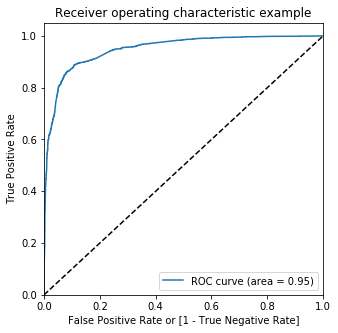

In [103]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Optimal cutoff point

We need find the probability at which Accuracy, Specificity, Sensitivity converge in a plot. It ensures the balance between three metrics so that we can maximize the performance of our model.

In [104]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.00079,8127,0,1,0,0,0,0,0,0,0,0,0
1,1,0.95173,8677,1,1,1,1,1,1,1,1,1,1,1
2,0,0.20733,5394,0,1,1,1,0,0,0,0,0,0,0
3,0,0.32334,8672,0,1,1,1,1,0,0,0,0,0,0
4,0,0.00918,8447,0,1,0,0,0,0,0,0,0,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

           prob  accuracy   sensi   speci
0.00000 0.00000   0.38789 1.00000 0.00000
0.10000 0.10000   0.76556 0.96886 0.63673
0.20000 0.20000   0.82812 0.94651 0.75310
0.30000 0.30000   0.87767 0.89820 0.86466
0.40000 0.40000   0.89192 0.86866 0.90665
0.50000 0.50000   0.89579 0.84351 0.92891
0.60000 0.60000   0.89207 0.80838 0.94510
0.70000 0.70000   0.87674 0.74890 0.95775
0.80000 0.80000   0.84252 0.62874 0.97799
0.90000 0.90000   0.81155 0.53054 0.98963


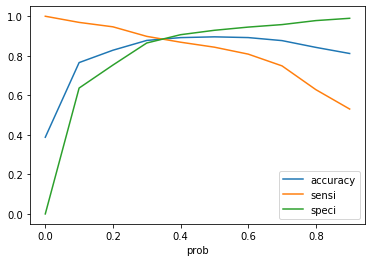

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [107]:
# From the curve above, 0.35 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.00079,8127,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.95173,8677,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.20733,5394,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.32334,8672,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.00918,8447,0,1,0,0,0,0,0,0,0,0,0,0


In [108]:
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8899039950449056


In [109]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3524,  429],
       [ 282, 2223]], dtype=int64)

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8874251497005988

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.8914748292436124

In [113]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.10852517075638755


In [114]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8382352941176471


In [115]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9259064634787179


In [116]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

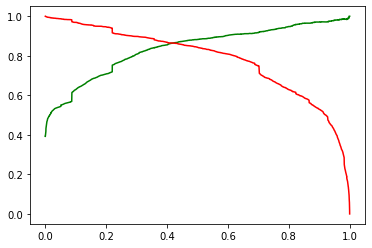

In [117]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on test data set:

In [118]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,...,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2973,4.00000,453,4.00000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5049,0.00000,0,0.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1120,0.00000,0,0.00000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5819,0.00000,0,0.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3289,0.00000,0,0.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
num_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [120]:
X_test[num_col] = scalar.transform(X_test[num_col])

In [121]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Finance Management,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
2973,-0.07641,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5049,-0.89966,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1120,-0.89966,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5819,-0.89966,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3289,-0.89966,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


predicted on test with cutoff of 0.35

In [122]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lm_12.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final['predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.24478,2973,0
1,1,0.99945,5049,1
2,0,0.08756,1120,0
3,1,0.99850,5819,1
4,1,0.99892,3289,1


In [123]:
accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted)

0.8937861271676301

In [124]:
confusion_test = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
confusion_test

array([[1546,  175],
       [ 119,  928]], dtype=int64)

In [125]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8863419293218721

In [127]:
# Let us calculate specificity
TN / float(TN+FP)

0.8983149331783846

In [128]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.10168506682161534


In [129]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8413417951042611


In [130]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9285285285285285


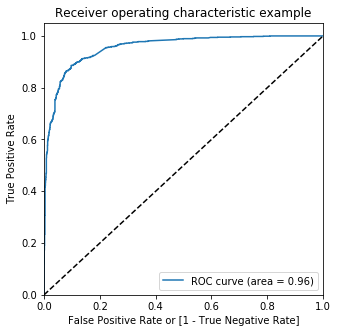

In [131]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Prob)

In [132]:
df[num_col] = scalar.transform(df[num_col])
X = sm.add_constant(df[cols])
y_pred = lm_12.predict(sm.add_constant(X))
df['Lead_Score'] = y_pred
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,...,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead_Score
0,0,-0.80933,-0.89966,-1.10535,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00264
1,0,0.36406,0.32522,0.05644,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00875
2,1,-0.33997,1.88449,-0.17592,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.84402
3,0,-0.57465,-0.34537,-0.64063,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00133
4,1,-0.33997,1.69548,-0.64063,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.43121


In [133]:
final  = pd.DataFrame({'Prospect_ID':Prospect_ID,'Lead_Score':df.Lead_Score*100})

In [134]:
final.head(15) #lead score is given out of 100 for each lead using Logistic regression model

,Prospect_ID,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0.26368
1,2a272436-5132-4136-86fa-dcc88c88f482,0.87532
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,84.40209
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0.13337
4,3256f628-e534-4826-9d63-4a8b88782852,43.12106
5,2058ef08-2858-443e-a01f-a9237db2f5ce,8.75632
6,9fae7df4-169d-489b-afe4-0f3d752542ed,69.43688
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,8.75632
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,23.14700
9,af465dfc-7204-4130-9e05-33231863c4b5,24.09029
